In [3]:
import os, re, cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [13]:
import torch
import importlib
import cv2
from PIL import Image
from argparse import ArgumentParser

from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, CenterCrop, Normalize, Resize
from torchvision.transforms import ToTensor, ToPILImage

from dataset import cityscapes
from erfnet import Net
from transform import Relabel, ToLabel, Colorize

In [14]:
NUM_CLASSES = 5
HEIGHT = 512
WIDTH = 904


In [37]:
assert os.path.exists("erfnet" + ".py"), "Error: model definition not found"
model_file = importlib.import_module("erfnet")
model = model_file.Net(NUM_CLASSES)
model = torch.nn.DataParallel(model)

In [38]:
model.load_state_dict(torch.load("../save/model_best_vol2.pth"))

<All keys matched successfully>

In [17]:
def plot_img(img, cmap='gray'):
    plt.figure(figsize=(12,6))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

In [18]:
def color_lanes(image, classes, i, color, HEIGHT, WIDTH):
    buffer_c1 = np.zeros((HEIGHT, WIDTH), dtype=np.uint8)
    buffer_c1[classes == i] = color[0]
    image[:, :, 0] += buffer_c1
    buffer_c2 = np.zeros((HEIGHT, WIDTH), dtype=np.uint8)
    buffer_c2[classes == i] = color[1]
    image[:, :, 1] += buffer_c2
    buffer_c3 = np.zeros((HEIGHT, WIDTH), dtype=np.uint8)
    buffer_c3[classes == i] = color[2]
    image[:, :, 2] += buffer_c3
    return image

In [28]:
col_images = []

In [29]:
dir_images = "C:\\Users\\arsayder\\PycharmProjects\\diff_masters\\erfnet_pytorch\\train\\test_data_2\\data"

In [30]:
len_of_images = len(os.listdir(dir_images))

In [31]:
len_of_images

171

In [33]:
for i in range(len_of_images):
    img = cv2.imread(dir_images + "\\" + str(i+1) + ".jpg")
    img = cv2.resize(img, (WIDTH, HEIGHT))
    col_images.append(img)

In [39]:
op_transforms = Compose([ToTensor()])
device = torch.device('cpu')
im_tensor = torch.unsqueeze(op_transforms(col_images[0]), dim=0)
im_tensor = im_tensor.to(device)

In [40]:
#img = cv2.imread('../train/test_data/data/21.jpg') 
#img = cv2.resize(img,(WIDTH, HEIGHT))

model = model.to(device)
model = model.eval()


In [41]:
out = model(im_tensor)
out = out.max(dim=1)[1]
out_np = out.cpu().numpy()[0]

RuntimeError: module must have its parameters and buffers on device cuda:0 (device_ids[0]) but found one of them on device: cpu

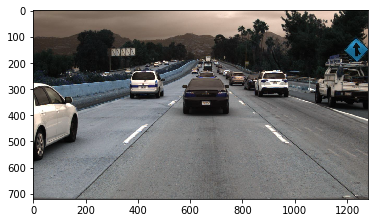

In [12]:
plt.imshow(col_images[3])